# Objective

- wrap up the week's main learning points
- examle on how to use statsmodel to build an ARIMA model
- tuning/configuring/fitting of an ARIMA model
- forecasting with an ARIMA model


[source](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)



[source](https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/)

## Recap

**The key aspects of an ARIMA model are the following:**

- **AR: Autoregression** A model that uses the dependent relationship between an observation and some number of lagged observations
- **I: Integrated** The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary
- **MA: Moving Average** A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations

**A standard notation is used of ARIMA(p,d,q) where the parameters representing each of the key aspects are substituted with integer values to quickly indicate the specific ARIMA model being used:**

- **p:** The number of lag observations included in the model, also called the lag order
- **d:** The number of times that the raw observations are differenced, also called the degree of differencing
- **q:** The size of the moving average window, also called the order of moving average

In [2]:
import warnings
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

<ipython-input-2-2946e5af1a76>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


## Dataset

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


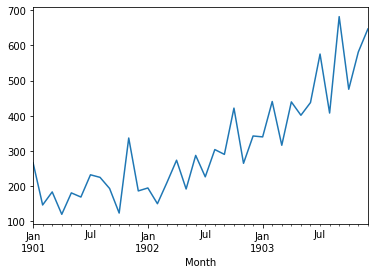

In [3]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
series = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv',
                  header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

print(series.head())

series.plot()
plt.show()

### Remarks on the time series:

1. has a clear positive trend
2. may have seasonality
3. may have additional time dependence

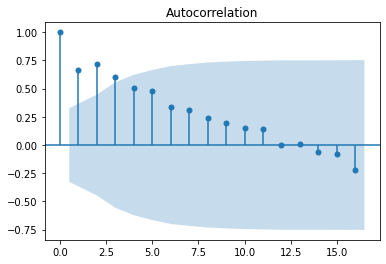

In [4]:
# let's plot autocorrelation plot and partial autocorrelation plot

plot_acf(series);

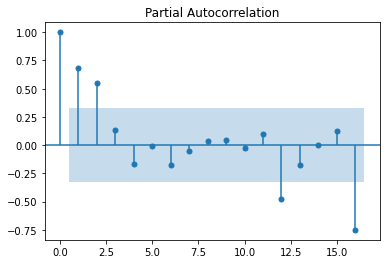

In [5]:
plot_pacf(series);

**Conclusions:**

The series appears to have:

1. A visible positive trend ==> d parameter will have a value greater than 0, possibly greater than 1
2. The acf and pacf plot suggest the presence of both autoregressive and moving average elements in the series, i.e.
   the values of p and q are both also greater than zero and probably greater than 2

## Construction of the ARIMA model

- The statsmodels library provides the capability to fit an ARIMA model

- An ARIMA model can be created as follows:

1. Define the model by calling ARIMA() and passing in the p, d, and q parameters
2. The model is prepared on the training data by calling the fit() function
3. Predictions can be made by calling the predict() function and specifying the index of the time or times to be predicted

In [6]:
# let's remove the day from the index as it is always the first of the month

series.index = series.index.to_period('M')

In [7]:
series

Month
1901-01    266.0
1901-02    145.9
1901-03    183.1
1901-04    119.3
1901-05    180.3
1901-06    168.5
1901-07    231.8
1901-08    224.5
1901-09    192.8
1901-10    122.9
1901-11    336.5
1901-12    185.9
1902-01    194.3
1902-02    149.5
1902-03    210.1
1902-04    273.3
1902-05    191.4
1902-06    287.0
1902-07    226.0
1902-08    303.6
1902-09    289.9
1902-10    421.6
1902-11    264.5
1902-12    342.3
1903-01    339.7
1903-02    440.4
1903-03    315.9
1903-04    439.3
1903-05    401.3
1903-06    437.4
1903-07    575.5
1903-08    407.6
1903-09    682.0
1903-10    475.3
1903-11    581.3
1903-12    646.9
Freq: M, Name: Sales, dtype: float64

In [26]:
# Let’s start off with fitting an ARIMA model to the entire series and review the residual errors

# I will start by fitting an ARIMA(5,1,0) model

model = ARIMA(series, order=(12,2,2)) # instanciation

model_fit = model.fit() # fit 

# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                ARIMA(12, 2, 2)   Log Likelihood                -178.528
Date:                Thu, 11 Nov 2021   AIC                            387.055
Time:                        15:23:44   BIC                            409.951
Sample:                    01-31-1901   HQIC                           394.863
                         - 12-31-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9528      0.272     -3.508      0.000      -1.485      -0.421
ar.L2         -0.2636      0.263     -1.004      0.316      -0.778       0.251
ar.L3          0.1295      0.285      0.455      0.6

In [27]:
model_fit.resid

Month
1901-01    266.000000
1901-02   -251.355457
1901-03    142.908348
1901-04     25.526252
1901-05     84.508846
1901-06     70.382734
1901-07    115.963246
1901-08     95.171049
1901-09     21.303534
1901-10   -103.208014
1901-11     74.301786
1901-12    -55.283711
1902-01    -15.898127
1902-02      2.912982
1902-03     24.326507
1902-04     57.541782
1902-05      7.258913
1902-06     15.850695
1902-07    -17.854599
1902-08     12.275165
1902-09    -13.316324
1902-10     22.591795
1902-11     20.591792
1902-12     43.791058
1903-01     26.456578
1903-02     35.065178
1903-03    -63.969314
1903-04     19.860776
1903-05     12.594666
1903-06    -33.970817
1903-07     49.719167
1903-08    -71.871778
1903-09     16.896685
1903-10     39.216399
1903-11    -38.242261
1903-12    -26.077947
Freq: M, dtype: float64

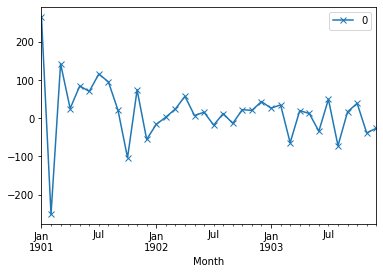

In [28]:
# line plot of residuals

# plot suggests that there may still be some trend information not captured by the model


residuals = pd.DataFrame(model_fit.resid)

residuals.plot(marker='x')
plt.show()

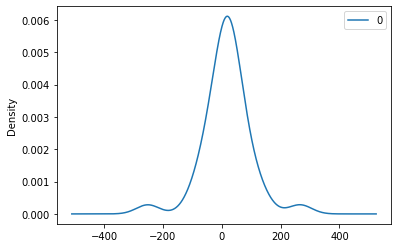

In [29]:
# density plot of residuals
# appears to be centered at a value slightly higher than zero, but the shape is Gaussian

residuals.plot(kind='kde')
plt.show()

In [30]:
# summary stats of residuals
print(residuals.describe())

                0
count   36.000000
mean    16.999100
std     80.390007
min   -251.355457
25%    -16.387245
50%     20.226284
75%     45.273085
max    266.000000


## Forecasting with an ARIMA model

- We can use the predict() function on the ARIMAResults object to make predictions
- the predict() function accepts the index of the time steps to make predictions as arguments, which are relative to the start of the training dataset used
- For example: if we used 100 observations in the training dataset to fit the model, then the index of the next time step for making a prediction would be specified to the prediction function as start=101, end=101. This would return an array with one element containing the prediction
- We also would prefer the forecasted values to be in the original scale, in case we performed any differencing (d>0). This can be specified by setting the typ argument to the value ‘levels’
- Alternately, we can avoid all of these specifications by using the forecast() function, which performs a one-step forecast using the model



- We can split the training dataset into train and test sets, use the train set to fit the model, and generate a prediction for each element on the test set

- A **rolling forecast** is required given the dependence on observations in prior time steps for differencing and the AR model. A crude way to perform this rolling forecast is to re-create the ARIMA model after each new observation is received

- We manually keep track of all observations in a list called history that is seeded with the training data and to which new observations are appended each iteration

### Split series into train and validation/test

In [14]:

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

In [15]:
# defining the list history and performing rolling forecast

history = [x for x in train]

predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast() # one prediction ahead in the future 
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


predicted=343.272180, expected=342.300000
predicted=293.329674, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220222, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365674, expected=575.500000
predicted=459.415021, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231274, expected=475.300000
predicted=672.914943, expected=581.300000
predicted=531.541449, expected=646.900000


In [16]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# rmsle

Test RMSE: 89.021


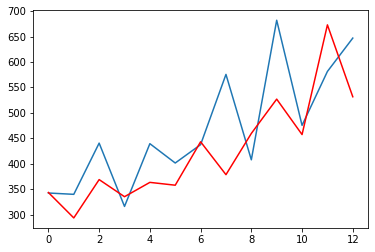

In [17]:
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## Tuning an ARIMA model

- the classical approach for fitting an ARIMA model is to follow the **Box-Jenkins Methodology**

- this is a process that uses time series analysis and diagnostics to discover good parameters for the ARIMA model

- the steps of this process are as follows:

1. **Model Identification** Use plots and summary statistics to identify trends, seasonality, and autoregression elements to get an idea of the amount of differencing and the size of the lag that will be required
2. **Parameter Estimation** Use a fitting procedure to find the coefficients of the regression model
3. **Model Checking** Use plots and statistical tests of the residual errors to determine the amount and type of temporal structure not captured by the model
4. process is repeated until either a desirable level of fit is achieved on the in-sample or out-of-sample observations (e.g. training or test datasets)



In [22]:
# choose the search space for the Grid Search tuning

p_values = range(11, 20)
d_values = range(0, 3)
q_values = range(0, 3)

In [23]:
# define a model evaluation function

def evaluate_arima_model(X, arima_order):
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

In [24]:
# define an evaluate models function

def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                        print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))


In [25]:
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(11, 0, 0) MSE=8202.883
ARIMA(11, 0, 2) MSE=8122.564
ARIMA(11, 1, 0) MSE=7188.766
ARIMA(11, 1, 1) MSE=5888.374
ARIMA(11, 2, 2) MSE=3587.206
ARIMA(12, 2, 2) MSE=3123.074
Best ARIMA(12, 2, 2) MSE=3123.074


## Further directions you can take

1. [Use an automatic ARIMA model tuner](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html)

2. Use a [time series cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html) to do the above Grid Search again 

3. Repeat the above Grid Search procedure again, but evaluate models using AIC and BIC, does the best model differ ?